# Fieldkit and OpenFTS

The primary use of fieldkit to to help users manipulate the field files generated by OpenFTS. 


## Writing fields for OpenFTS

Lets use fieldkit to initialize fields to trap a simulation in the HEX phase. First we will initialize the $w_-$ field and plot it


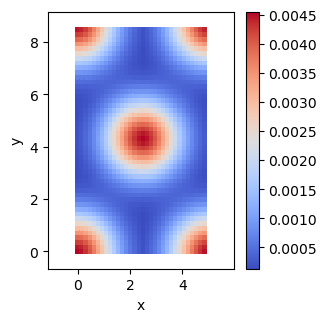

In [1]:
import fieldkit as fk
import numpy as np

# initialize a field with the appropriate cell size
npw=(32,48)
Lx = 5.0
Ly = Lx*np.sqrt(3)
h = np.array([[Lx,0],[0,Ly]])
field_wminus = fk.Field(npw_Nd=npw,h=h) 

fk.add_gaussian(field_wminus,center=(0,0), sigma=1.0)
fk.add_gaussian(field_wminus,center=(0.5*Lx,0.5*Ly), sigma=1.0) 

fk.plot(field_wminus,dpi=100)

Now lets randomly initialize the $w_+$ field

In [2]:
field_wplus = fk.Field(npw_Nd=npw,h=h)
field_wplus.data = np.random.random(npw)

Finally we can write the two fields to a file which can be read using OpenFTS

In [3]:
fk.write_to_file('fields_in.dat',[field_wplus, field_wminus])

Writting 2 fields to fields_in.dat


## Reading fields from OpenFTS

Reading an OpenFTS field file is just as straightforward 


In [4]:
fields = fk.read_from_file('density_2d_hex.dat')

This function returns a list of fields corresponding to each field stored in the field file

In [5]:
fields

Plotting a list of fields can use the same `plot()` function as before

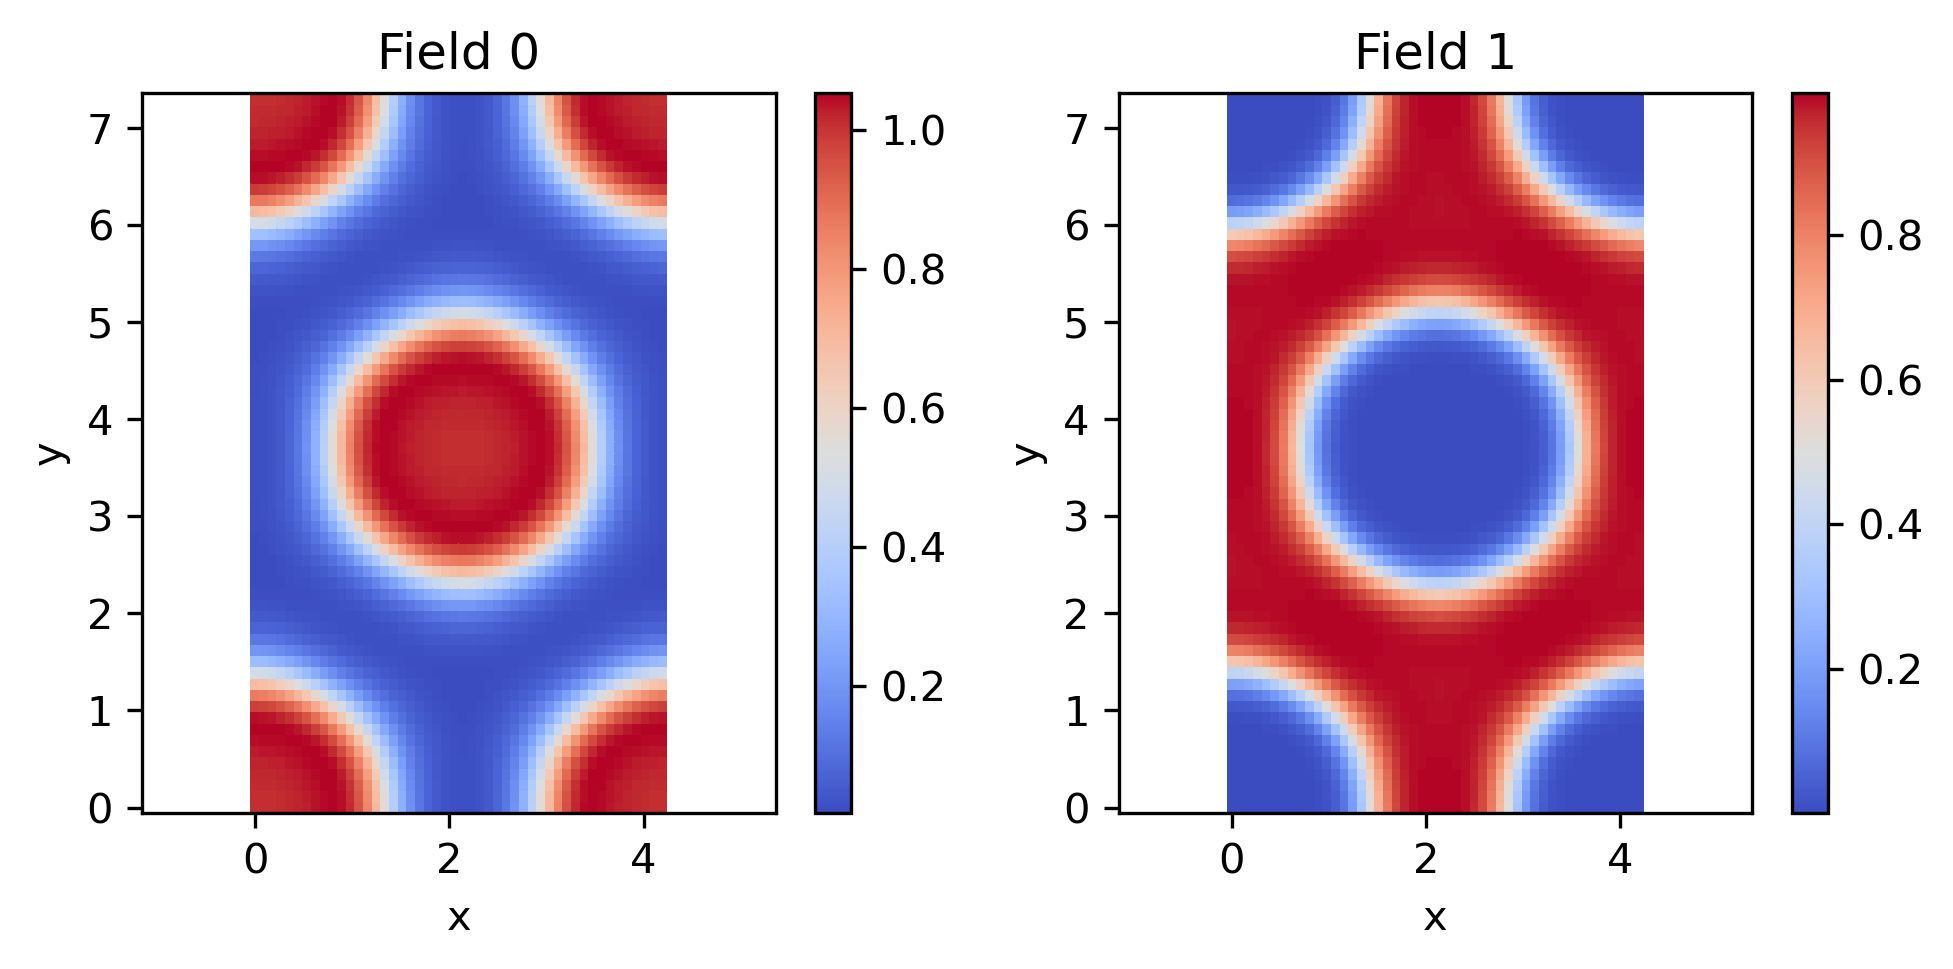

In [6]:
fk.plot(fields)

Just reading and writing files isn't terribly interesting. Check out the next tutorial for how to manipulate field files.